#Graphs in ML - TD1

##Antonin GAY - MVA 2018/19

###Exercice 1

Dans cet exercice nous allons comparer les techniques de $\varepsilon$ et <i>k-nn</i> pour créer des graphs connectés.

Dans un premier temps, nous importons les fonctions créées pour l'occasion, complétées et disponibles avec ce rapport.

In [1]:
from graph_construction.graph_cstr_func import *
from graph_construction.generate_data import *
import scipy.io as sio

import warnings # We hide the warning messages
warnings.filterwarnings('ignore')

Une fois les fonction complétées, nous pouvons les utiliser pour créer des graphs, tels qu'illustrés sur les figures suivantes:

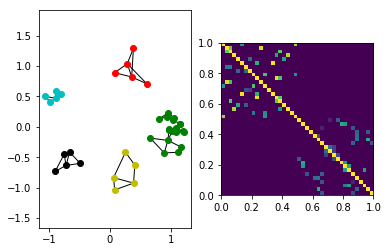

In [2]:
[X,Y] = blobs(100, 5, 0.2)
plot_similarity_graph(X,Y, 0, 2)

Figure 1 - Blobs connected with <i>k-nn</i>

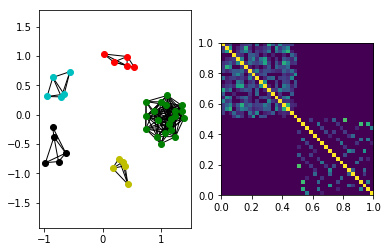

In [3]:
[X,Y] = blobs(100, 5, 0.2)
plot_similarity_graph(X,Y, 0.08, 0)

Figure 1 - Blobs connected with $\varepsilon$

####Question 1.1

La function wortcaseblob génère un cluster en 2D, puis applique un offset important au dernier point de ce cluster. La valeur de cet offset est réglée par le paramètre donné à la fonction.

Cette fonction permet de simuler un cluster dans un cas assez extrême où un point est isolé seul, loin du cluster principal. Dans ce type de cas, le point isolé a de grandes chances, dans le cas d’un graphe ε, de se retrouver non-connecté au graphe. Et choisir une valeur pour ε qui permette de connecter ce point au reste du graphe a souvent pour effet de connecter tous les autres points du graphe ensemble, menant alors à un (quasi-)fully-conneted graph.

Nous allons donc utiliser cette génération de points particulières pour étudier un cas limite d’un ε graphe.


####Question 1.2

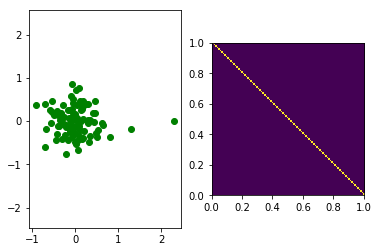

Worst case blob pour gen_pam=1


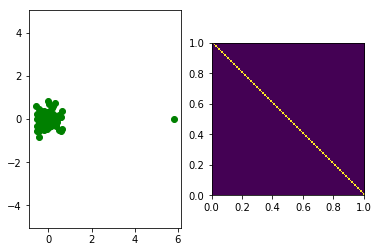

Worst case blob pour gen_pam=5


In [4]:
[X,Y] = worst_case_blob(100, 1)
plot_similarity_graph(X,Y, 1, 0)
print('Worst case blob pour gen_pam=1')

[X,Y] = worst_case_blob(100, 5)
plot_similarity_graph(X,Y, 1, 0)
print('Worst case blob pour gen_pam=5')


Si le paramètre est grand (ce qui est finalement déjà le cas dès la Figure précédente pour <i>gen_pam=1</i>) le point isolé va être tellement éloigné du cluster principal, que pour le relier à celui-ci avec un ε graphe, tous les autres points seront connectés entre eux, comme illustré sur la Figure suivante. On se retrouve dans ce cas avec un fully-connected graph, ce qui n’est pas souhaité.

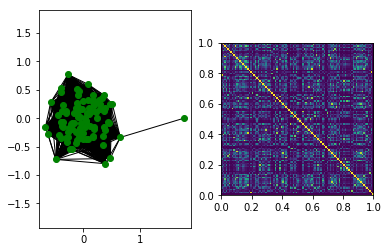

Epsilon optimal = 0.002891600952838893
Détermination de \epsilon optimal pour gen_pam=1


In [5]:
how_to_choose_epsilon(1)
print('Détermination de \epsilon optimal pour gen_pam=1')

###Question 1.3

J'ai choisi d'étudier le dataset Two moons.

Sur le dataset "Two moons", nous pouvons appliquer les deux méthodes, celles des k-nn et ε. Dans un premier temps, nous allons utiliser la technique de $\varepsilon$, et tenter de trouver "à la main" un epsilon qui permettrait d'obtenir nos deux clusters sans laisser de point isolé.

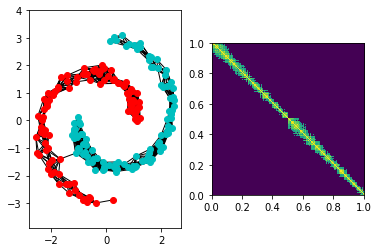

In [6]:
var = 1
out = sio.loadmat('data/data_2moons.mat')
plot_similarity_graph(out['X'], out['Y'], 0.5, 0, var)

$\varepsilon=0.5$

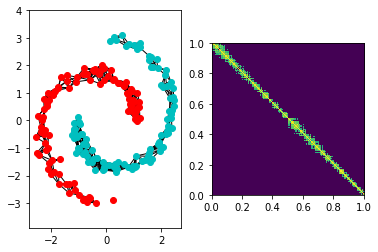

In [7]:
plot_similarity_graph(out['X'], out['Y'], 0.6, 0, var)

$\varepsilon=0.6$

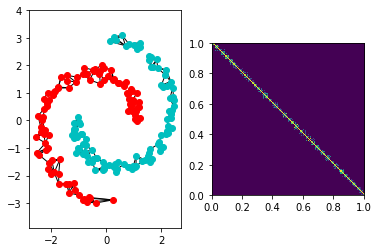

In [8]:
plot_similarity_graph(out['X'], out['Y'], 0, 4)

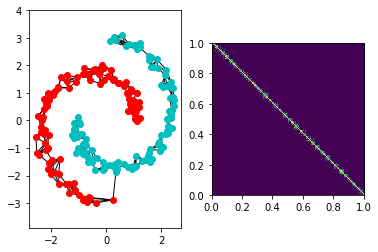

In [9]:
plot_similarity_graph(out['X'], out['Y'], 0, 5)

Ces deux exemples nous permettent de voir que sur ce dataset, aucune des deux techniques présentées dans cet exercice ne peut convenir, et former deux clusters sans laisser de points isolés. En effet, pour le k-nn, un k=4 crée 3 clusters, et le passage à k=5 ne forme plus qu’un seul cluster, comme montré en Figure 3. Tandis que pour le ε, c’est au niveau d’un des points extrêmes du cluster rouge que le bât blesse : il est plus éloigné du cluster rouge que le plus proche des points du cluster bleu, comme l’illustre l’image de droite de la Figure 4. Il n’est donc pas possible de ne former que deux clusters sans point isolé avec la technique de ε.

Une solution pour régler ce problème pourrait être de modifier un peu nos techniques, en faisant appel aux k-nn symétrique par exemple : deux points ne se relient que si chacun est dans les k plus proches de l’autre. Ainsi, dans le cas k=5, le point rouge isolé ne se relierait pas au cluster bleu, car il ne serait pas dans les cinq points les plus proches du point du cluster bleu auquel il se relie actuellement.


##Exercice 2 - Spectral clustering

In [10]:
from spectral_clustering.spctr_clstr_func import *


###Question 2.1

Après avoir complété les deux fonctions, nous appliquons notre premier spectral clustering. Nous générons le Laplacien du graph, puis en déterminons les valeurs propres classées dans l'ordre croissant, et les vecteurs propres. Nous prenons alors les deux premiers vecteurs propres et nous séparons leurs valeurs (dans $R^2$) en deux clusters avec un K-means. Cette séparation nous donne l'appartenance de chaque point du graphe à un cluster ou l'autre.

Nous appliquons alors l'algorithme sur un exemple simple d'un double blobs.

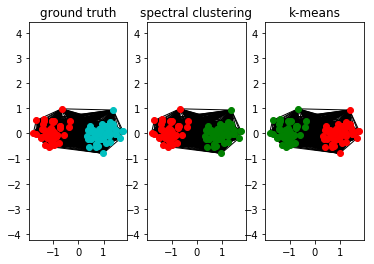

In [11]:
two_blobs_clustering()

###Question 2.2

Cette fois-ci, nous réappliquons la même méthode, mais sur un graphe où les deux blobs ne sont plus connectés. Afin de réaliser notre séparation spectrale, nous utilisons toujours les deux premiers vecteurs propres, 

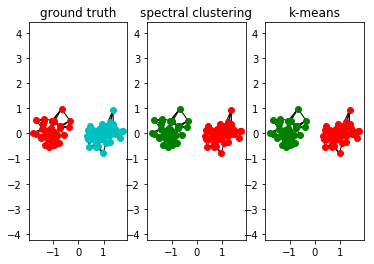

In [12]:
two_blobs_clustering(4)

###Questinon 2.3

La fonction <i>choose_eig_function</i> essaie de trouver un coude dans la visualisation des valeurs propres du laplacien (triées par ordre croissant), et sélectionne les vecteurs propres liés aux valeurs propres situées avant ce coude. Pour ce faire, j'étudie la dérivée de cette courbe (visible sur les figure suivantes) et m'arrête lorsque cette dérivée possède un maximum local. Cette méthode fonctionne assezbien pour une variance plus élevée et s'avère généralement efficace aussi pour une variance plus faible, comme dans l'exemple suivant.

Chosen eigenvectors indices : 
[0 1 2 3]


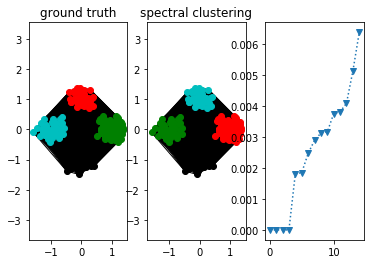

In [13]:
find_the_bend(0.03)

###Question 2.4

Le changement de la variance a pour effet principal que les 4 premières valeurs propres, qui étaient quasiement nulles précédemment, ne le sont plus. Cela nous force à changer notre critère de choix des vecteurs propres, qui ne peut plus se faire seulement sur un critère de valeur, mais sur l'évolution de ces valeurs, via la recherche d'un "coude", comme expliqué précédemment.

Chosen eigenvectors indices : 
[0 1 2 3]


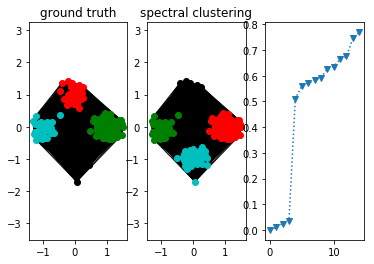

In [14]:
find_the_bend(0.2)

###Question 2.5

Lors de l'assignement des clusters, j'ai utilisé les <i>k-means</i>. Ceux-cis semblent plus efficaces qu'un seuil dans le cas d'une grande variance.

###Question 2.6

Observer la distribution des valeurs propres peut nous indiquer à quel point nos clusters sont bien disjoints les uns des autres. En effet, plus les clusters vont être proches les uns des autres, et leurs valeurs mélangées, plus le choix de ceux-ci sera dur, et moins le coude, dans les valeurs propres, sera apparent. 

Ainsi, si les <i>k</i> premières valeurs propres sont bien séparées du reste, les clusters seront plus nets.

###Question 2.7

Dans le cas des two-moons où les graph est non-non-connecté, l'algorithme de clustering spectral est beaucoup plus efficace que le <i>k-means</i>, puisqu'il retrouve le résultat réel, là où le <i>k-means</i> le découpe de manière linéaire. Celà est probabement dû au fait que le spectral clustering ne se repose pas sur les distances directes des points entre eux, mais entre les distances de ceux-ci dans le plan fréquentiel via leurs vecteurs propres, qui ne sont alors plus reliés directement à leur position dans l'espace.

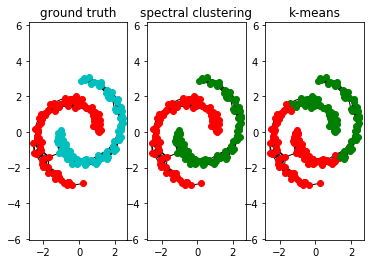

In [15]:
two_moons_clustering()

###Question 2.8

Dans l'exemple du <i>point and circle</i>, nous observons une différence nette entre l'utilisation du Laplacien non-normalisé et normalisé. En effet, ce premier va créer un cluster autout d'un point isolé de la figure, qui cependant tient plus de l'abération statistique que du cluster. Les deux versions normalisées, quant à elles, créent deux clusters correspondant bien au point et cercles recherchés. Néanmoins, sur cet exemple précis, et comme visible sur les figures ci-dessous, la normalisation symétrique obtient un résultat plus proche de la réalité que la normalisation de la random walk.

La différence avec la version non-normalisée vient du fait que les versions normalisées vont donner moins de poids à ce point isolé de par son caractère isolé, car elles visent à créer des clusters qui ne soient pas trop déséquilibrés en terme de nombre d'éléments, ce à quoi la verion non-normalisée ne donne pas d'importance.

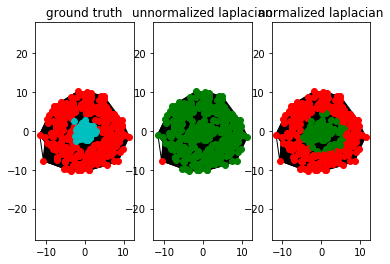

In [16]:
point_and_circle_clustering('rw')

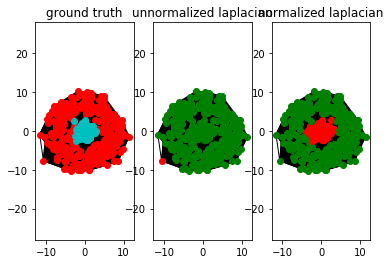

In [17]:
point_and_circle_clustering('sym')

###Question 2.9

Le graphe ARI suivant a été généré en faisant varier le paramètre <i>k</i>. On observe alors que le clusteing spectral est assez sensible à la connectivité originale du graphe. En effet, lorsque le paramètre <i>k</i> est trop bas, et que donc le graphe n'est non-connecté, le résultat du clusteing spectral obtient un mauvais résultat. Nénamoins, ce résultat devient très bon lorsque le graphe devient relié (<i>k</i>=4 ou 5), mais rediminue, bien que plus lentement, lorsque le graphe devient trop connecté, avec <i>k</i> qui grandit. Jusqu'à deenir assez mauvais dès que <i>k</i>>7, lorsque le graphe devient <i>fully-connected</i>.

Le clustering spectral n'est donc que peu stable face à la connectivité originale du graphe.

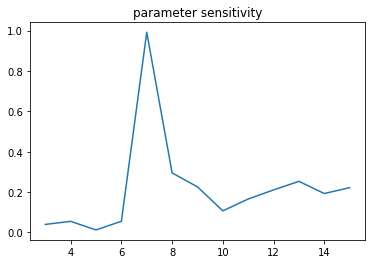

In [24]:
parameter_sensitivity('unn')

###Question 2.10

Lorsque nous n'avons pas accès à la 'vérité' (ce qui est le cas en pratique sur la majorité des applications réelles), il devient plus compliqué de savoir si les résultats de notre clustering sont bons ou non. Une solution pourrait alors être de comaprer les résultats de plusieurs méthodes et d'essayer de voir si elles sont cohérentes entre elles, ou de sélectionner celle qui nous semble la plus cohérente en cas d'opposition.

Une autre possibilité pourrait être d'étudier la cohérence des résultats d'une méthode lorsque nous faisons évoluer la connectivité du graphe, comme précédemment, pour en déduire sa stabilité, et d'essayer de déduire de ces différents résultats obtenus celui(ceux) qui semblent le plus cohérent(s).

##Exercice 3

###Question 3.1

Le code est fourni avec ce rapport et commenté.

La segmentation d'image est appliquée aux deux exemples suivants, eton observe qu'elle fonctionne assez bien, clusterant les couleurs proches ensemble dans le premier exemple. Le second exemple pose légèrement plus problème, car le rouge et l'orange sont considérés comme deux couleurs identiques par l'algorithmes, étant très proches l'une de l'autre. Néanmoins, les autre couleurs restent bien séparées les unes des autres.

In [19]:
from image_segmentation.image_segmentation import *

start of image segmentation : duration on an Intel i5 is about 2mn30
Beginning of computation


Chosen eigenvectors indices : 
[0 1 2 3 4 5]


end of computation
Duration : 107.13335347175598 seconds


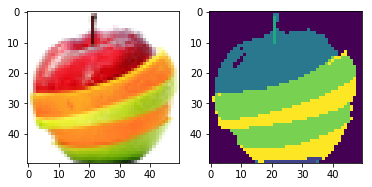

In [20]:
image_segmentation('data/fruit_salad.bmp')

start of image segmentation : duration on an Intel i5 is about 2mn30
Beginning of computation


Chosen eigenvectors indices : 
[0 1 2 3]


end of computation
Duration : 112.26642274856567 seconds


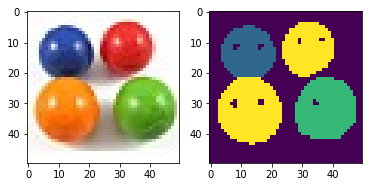

In [21]:
image_segmentation('data/four_elements.bmp')


###Question 3.2

Deux techniques pour limiter l'occupation de mémoire et de puissance processeur sur de grandes images seraient:

1. Réduire la résolution des images avant traitement, afin de les réduire de 1920*1080 à de bien plus petites tailles, telles que les 50*50 utilisées ici. Cela nous ferait néanmoins perdre les détails de l'image, mais permettrait tout de même de déterminer les couleurs principales de l'image.

2. Découper l'image en plusieurs plus petites imagettes, et les traiter individuellement. En divisant l'image en 1920*1080 en blocs d'environ 50*50, qu'on traite les uns après les autres. Cette technique permet avant tout de limiter la quantité de mémoire nécessaire, et elle demande aussi moins de puissance de calcul, et peut même être aisément parallélisée, réduisant d'autant plus le temps de calcul sur une machine mutli-coeur (majorité des PC et smartphones actuels). Néanmoins, il faudra ensuite ajouter une étape supplémentaire afin de comparer les différentes segmentations entre les imagettes, afin d'avoir un tout cohérent.

###Question 3.3

J'utilisais la fonction <i>np.linalg.eig</i> pour générer les valeurs propres de la matrices.
J'ai donc réalisé une comparaison entre cette méthode et la fonction <i>scipy.sparse.linalg.eigs</i>, en comparant les temps de calculs de chacune des méthodes, sur l'image 'four_elements', avec mon PC, contenant un Intel i5 portable :

- Avec <i>np.linalg.eig</i>, le temps de calcul total est de 101s

- Avec <i>scipy.linalg.eigs</i>, le temps de calcul total est de 144s

Nous observons donc sur cet exemple que la fonction <i>np.linalg.eig</i> est plus rapide que sa concurrente <i>scipy.sparse.linalg.eigs</i>.